In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

x0 = [[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]]
a0 = [2.0, -1.0, 1.5]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]], [2.0, -1.0, 1.5], 2, 3)

In [4]:
# Define the number of Fourier coefficients
fc = 6
n = 2fc + 1

# Define noise level
noise_level = 0.1

# Seed for noise
# Random.seed!(22)

0.1

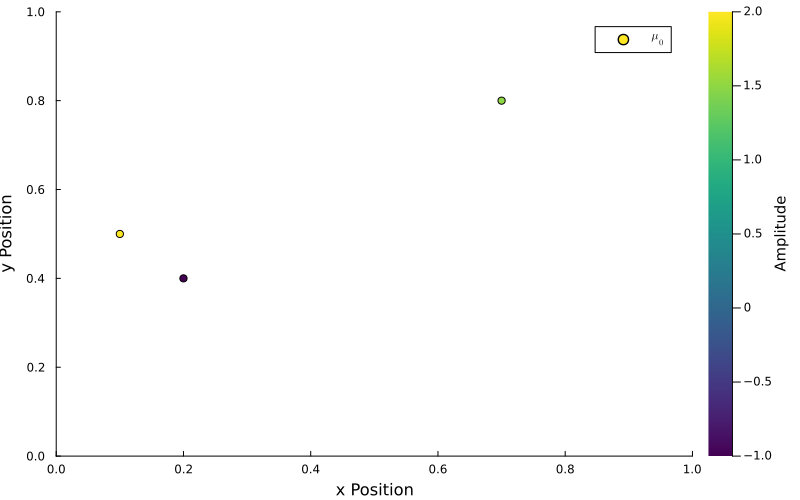

In [5]:
# Define the plot
num_points = 100

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

plt_gt = deepcopy(plt)
plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis)

169-element Vector{ComplexF64}:
  0.08052790107747569 + 0.04734666827581612im
  -0.1247168474964239 - 0.04260485216469342im
 -0.28267551797520385 + 0.03474477101231842im
 -0.03237407009861664 - 0.08458106843635828im
  0.05431896164762405 - 0.33519988937136547im
   0.0690876517835388 - 0.16664067946793812im
  0.25853788320702187 + 0.15819515033612042im
  0.17261196969009113 + 0.09493522512591755im
 -0.11775825364182346 + 0.10764688058059446im
 -0.10997480151599476 + 0.1661673557861553im
                      ⋮
 -0.11775825364182346 - 0.10764688058059446im
  0.17261196969009113 - 0.09493522512591754im
  0.25853788320702187 - 0.15819515033612042im
  0.06908765178353879 + 0.16664067946793812im
  0.05431896164762405 + 0.33519988937136547im
 -0.03237407009861664 + 0.08458106843635828im
 -0.28267551797520385 - 0.03474477101231842im
  -0.1247168474964239 + 0.04260485216469342im
  0.08052790107747568 - 0.04734666827581612im

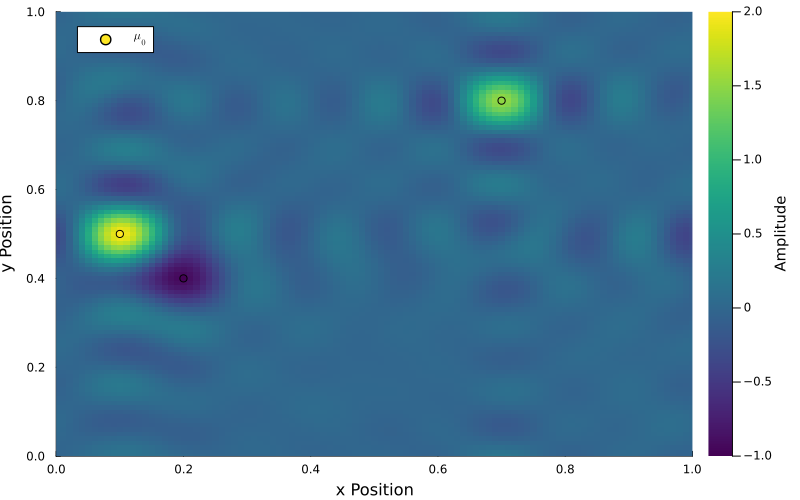

In [45]:
ops = fourier_operators_2D(fc, plt_grid_x1, plt_grid_x2)

y0 = ops.Φ(x0..., a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = fftshift(fft(randn(length(y0))))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

display(y)

heatmap!(plt_obs, grid, grid, ops.adjΦ(y), color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0")

## Pre-certificate

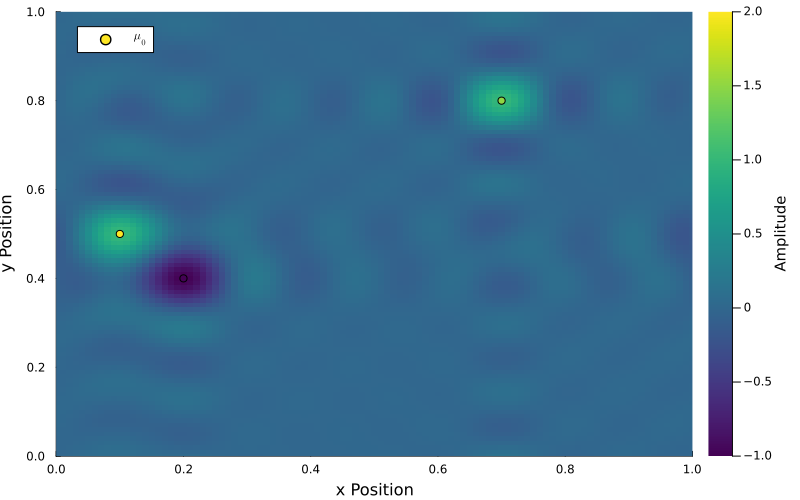

In [7]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0")

### SFW

In [46]:
# Define λ the regularisation parameter
λ = noise_level

prob = BLASSO(y, ops, domain, λ)

BLASSO{ComplexF64}(ComplexF64[0.08052790107747569 + 0.04734666827581612im, -0.1247168474964239 - 0.04260485216469342im, -0.28267551797520385 + 0.03474477101231842im, -0.03237407009861664 - 0.08458106843635828im, 0.05431896164762405 - 0.33519988937136547im, 0.0690876517835388 - 0.16664067946793812im, 0.25853788320702187 + 0.15819515033612042im, 0.17261196969009113 + 0.09493522512591755im, -0.11775825364182346 + 0.10764688058059446im, -0.10997480151599476 + 0.1661673557861553im  …  -0.10997480151599477 - 0.1661673557861553im, -0.11775825364182346 - 0.10764688058059446im, 0.17261196969009113 - 0.09493522512591754im, 0.25853788320702187 - 0.15819515033612042im, 0.06908765178353879 + 0.16664067946793812im, 0.05431896164762405 + 0.33519988937136547im, -0.03237407009861664 + 0.08458106843635828im, -0.28267551797520385 - 0.03474477101231842im, -0.1247168474964239 + 0.04260485216469342im, 0.08052790107747568 - 0.04734666827581612im], Operators(var"#ϕ#207"{Int64, Matrix{Int64}}(6, [-6 -6; -5 -6;

In [68]:
prob_sfw = deepcopy(prob)

solve!(prob_sfw, :SFW, options=Dict(:maxits => 100))

BLASSO{ComplexF64}(ComplexF64[0.08052790107747569 + 0.04734666827581612im, -0.1247168474964239 - 0.04260485216469342im, -0.28267551797520385 + 0.03474477101231842im, -0.03237407009861664 - 0.08458106843635828im, 0.05431896164762405 - 0.33519988937136547im, 0.0690876517835388 - 0.16664067946793812im, 0.25853788320702187 + 0.15819515033612042im, 0.17261196969009113 + 0.09493522512591755im, -0.11775825364182346 + 0.10764688058059446im, -0.10997480151599476 + 0.1661673557861553im  …  -0.10997480151599477 - 0.1661673557861553im, -0.11775825364182346 - 0.10764688058059446im, 0.17261196969009113 - 0.09493522512591754im, 0.25853788320702187 - 0.15819515033612042im, 0.06908765178353879 + 0.16664067946793812im, 0.05431896164762405 + 0.33519988937136547im, -0.03237407009861664 + 0.08458106843635828im, -0.28267551797520385 - 0.03474477101231842im, -0.1247168474964239 + 0.04260485216469342im, 0.08052790107747568 - 0.04734666827581612im], Operators(var"#ϕ#207"{Int64, Matrix{Int64}}(6, [-6 -6; -5 -6;

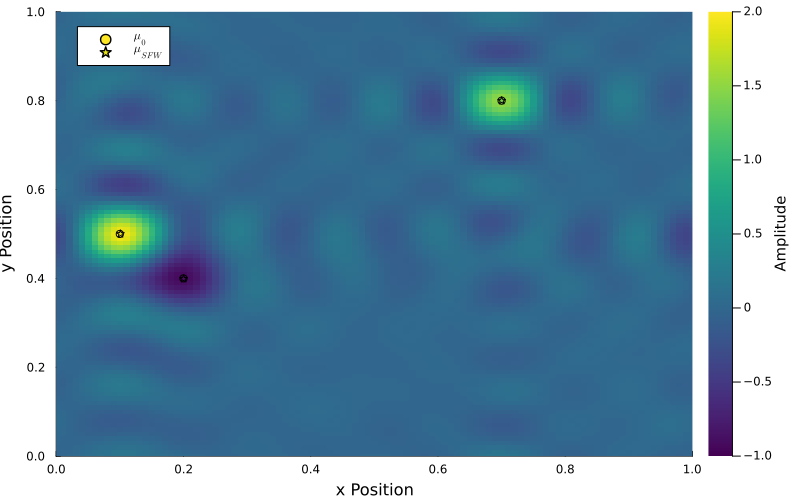

In [69]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob_sfw.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)